# Look for post starburst galaxies from JM fastspec catalog of DESI EDR

* cut fastspec catalog based on 
  * Virgo RA, DEC
  * redshift
  
* identify post starburst spectra using JM catalog
* visually inspect - how many are there, where are they

* then match post starburst galaxies to VFS, remembering that on VFS can have multiple spectra

In [4]:
from astropy.io import fits
from astropy.table import Table
import os
import numpy as np
from matplotlib import pyplot as plt

homedir = os.getenv("HOME")

In [5]:
infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji.fits')

In [6]:
fspectable = fits.open(infile)
fspec = Table(fspectable['FASTSPEC'].data)
fmeta = Table(fspectable['METADATA'].data)

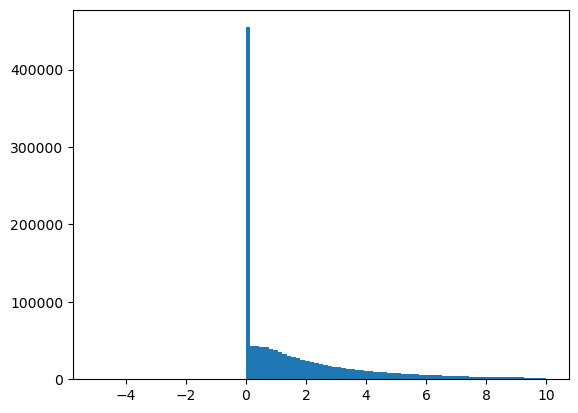

number with Hdelta absorption = 14618


In [47]:
plt.figure()
mybins = np.linspace(-5,10,100)
plt.hist(fspec['HDELTA_EW'],bins=mybins)
plt.show()

print(f"number with Hdelta absorption = {np.sum(fspec['HDELTA_EW'] < -5)}")

In [104]:
# fastspec fit uses EW > 0 for emission
fpsbflag = (fspec['OII_3726_EW'] < 2.5)  & (fspec['OII_3729_EW'] < 2.5) &  (fspec['HDELTA_EW'] < -0) & ((fspec['SNR_R']**2 + fspec['SNR_B']**2 + fspec['SNR_Z']**2) > 10**2)
print(f"number of psb galaxies = {np.sum(fpsbflag)}")

number of psb galaxies = 10


In [105]:
newtab = Table([fmeta['TARGETID'][fpsbflag],fmeta['RA'][fpsbflag],fmeta['DEC'][fpsbflag]])

outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fsf-psb-legacyviewer.fits')

newtab.write(outfile,format='fits',overwrite=True)

In [26]:
fmeta.colnames

['TARGETID',
 'SURVEY',
 'PROGRAM',
 'HEALPIX',
 'TILEID_LIST',
 'RA',
 'DEC',
 'COADD_FIBERSTATUS',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'Z',
 'ZWARN',
 'DELTACHI2',
 'SPECTYPE',
 'Z_RR',
 'TSNR2_BGS',
 'TSNR2_LRG',
 'TSNR2_ELG',
 'TSNR2_QSO',
 'TSNR2_LYA',
 'PHOTSYS',
 'LS_ID',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'EBV',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'CMX_TARGET',
 'SV1_DESI_TARGET',
 'SV1_BGS_TARGET',
 'SV1_MWS_TARGET',
 'SV2_DESI_TARGET',
 'SV2_BGS_TARGET',
 'SV2_MWS_TARGET',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SV1_SCND_TARGET',
 'SV2_SCND_TARGE

In [44]:
ramin = 100
ramax = 280
decmin = -1.3
decmax = 75
zmin = 500./3e5
zmax = 3500./3e5

raflag = (fmeta['RA'] > ramin) & (fmeta['RA'] < ramax)
decflag = (fmeta['DEC'] >decmin) & (fmeta['DEC'] < decmax)
zflag = (fmeta['Z'] > zmin) & (fmeta['Z'] < zmax)
specflag = fmeta['SPECTYPE'] == 'GALAXY'
zwarnflag = fmeta['ZWARN'] == 0
keepflag =  raflag & decflag & zflag & specflag & zwarnflag
print(f"{np.sum(keepflag)}")

1085


In [45]:
outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-fastspec-virgo.fits')
fspec[keepflag].write(outfile,format='fits',overwrite=True)


outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-meta-virgo.fits')
fmeta[keepflag].write(outfile,format='fits',overwrite=True)



In [7]:
infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-fastspec-virgo.fits')
vspec = Table.read(infile)


infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-meta-virgo.fits')
vmeta = Table.read(infile)


/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1781394712.py:3: RuntimeWarning: divide by zero encountered in divide
  x = np.log10(vspec['NII_6584_FLUX']/vspec['HALPHA_FLUX'])
/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1781394712.py:3: RuntimeWarning: invalid value encountered in divide
  x = np.log10(vspec['NII_6584_FLUX']/vspec['HALPHA_FLUX'])
/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1781394712.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(vspec['NII_6584_FLUX']/vspec['HALPHA_FLUX'])
/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1781394712.py:5: RuntimeWarning: divide by zero encountered in divide
  y = np.log10(vspec['OIII_5007_FLUX']/vspec['HBETA_FLUX'])
/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1781394712.py:5: RuntimeWarning: invalid value encountered in divide
  y = np.log10(vspec['OIII_5007_FLUX']/vspec['HBETA_FLUX'])
/var/folders/d_/xbzntjjj2rz0

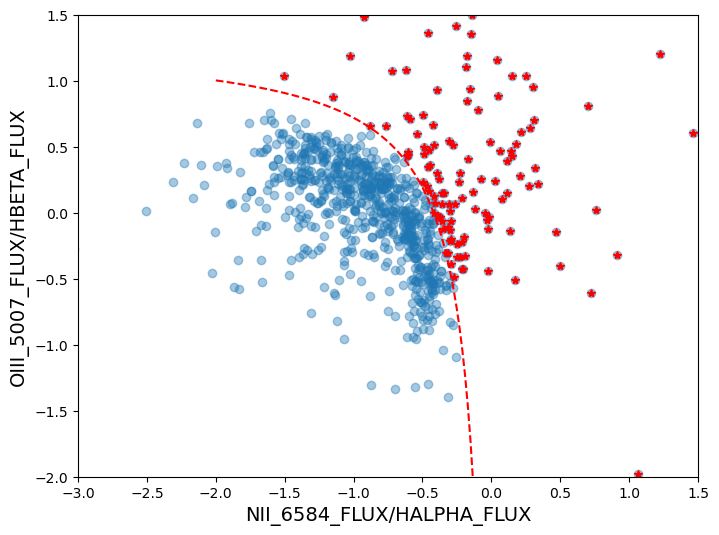

In [9]:

# BPT diagram
plt.figure(figsize=(8,6))
x = np.log10(vspec['NII_6584_FLUX']/vspec['HALPHA_FLUX'])

y = np.log10(vspec['OIII_5007_FLUX']/vspec['HBETA_FLUX'])

plt.scatter(x,y,alpha=.4)
plt.ylim(-2,1.5)
plt.xlim(-3,1.5)
plt.xlabel("NII_6584_FLUX/HALPHA_FLUX",fontsize=14)
plt.ylabel("OIII_5007_FLUX/HBETA_FLUX",fontsize=14)


xline = np.linspace(-2,-.01,100)
yline = .61/(xline-.05)+1.3

plt.plot(xline,yline,'r--')

ycut = .61/(x-.05)+1.3
agnflag =  (y > ycut) | (x > 0)

plt.plot(x[agnflag],y[agnflag],'r*')
#self.AGNKAUFF= (np.log10(self.cat['O3FLUX']/self.cat['HBFLUX']) > (.61/(np.log10(self.cat['N2FLUX']/self.cat['HAFLUX']-.05))+1.3)) | (np.log10(self.cat['N2FLUX']/self.cat['HAFLUX']) > 0.)

In [ ]:
vfspec.colnames

# make a plot to identify post starburst galax

(-10.0, 10.0)

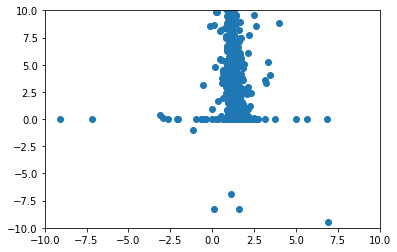

In [50]:
x = vspec['DN4000_OBS']

y = vspec['HDELTA_EW']

plt.figure()
plt.scatter(x,y)
plt.xlim(-10,10)
plt.ylim(-10,10)

# Greene+2021

* A blue slope in the continuum flux between 4700 Å and 8000 Å, such that F(4700 Å)/F(8000 Å) > 1.
  
* A Dn 4000 break >1.5 to indicate a stellar population not dominated by hot, young stars.
* No Hα emission-line flux (we allow [N II] λ λ 6548, 6583 Å emission).
* Weak to absent [O II] λ3727 emission, typically with less than ∼5 Å equivalent width 8 .
* Strong hydrogen Balmer absorption lines (Hβ, Hγ, Hδ) of at least 2 Å equivalent width—a value corresponding to the "Hδ-strong" galaxies of Barger et al. (1996).

<ipython-input-90-1bc6c9719697>:1: RuntimeWarning: divide by zero encountered in log10
  gmag = 22.5 - 2.5*np.log10(vmeta['FIBERFLUX_G'])


(array([3., 0., 1., 0., 2., 1., 3., 6., 3., 1.]),
 array([22.219208, 22.449694, 22.680178, 22.910664, 23.14115 , 23.371635,
        23.60212 , 23.832605, 24.063091, 24.293575, 24.524061],
       dtype=float32),
 <BarContainer object of 10 artists>)

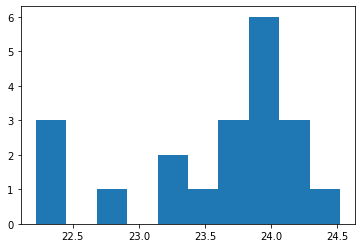

In [90]:
gmag = 22.5 - 2.5*np.log10(vmeta['FIBERFLUX_G'])
plt.figure()
plt.hist(gmag[psbflag])

In [ ]:
vspec

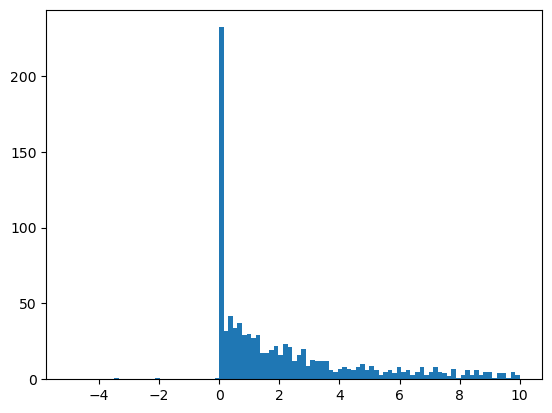

number with Hdelta absorption = 24


In [39]:
plt.figure()
mybins = np.linspace(-5,10,100)
plt.hist(vspec['HDELTA_EW'],bins=mybins)
plt.show()

print(f"number with Hdelta absorption = {np.sum(vspec['HDELTA_EW'] < -5)}")

In [102]:
gmag = 22.5 - 2.5*np.log10(vmeta['FIBERFLUX_G'])
o3cont_snr = vspec['OIII_4959_CONT']*np.sqrt(vspec['OIII_4959_CONT_IVAR'])
# green+2021
psbflag = (vspec['DN4000_OBS'] > 1.5) & (vspec['OII_3726_EW'] < 5)  & (vspec['OII_3729_EW'] < 5) &  (vspec['HDELTA_EW'] > 2) & (vspec['SNR_R'] > 2.5)
# chen+2019
# fastspec fit uses EW > 0 for emission
psbflag = (vspec['OII_3726_EW'] < 2.5)  & (vspec['OII_3729_EW'] < 2.5) &  (vspec['HDELTA_EW'] < -4) & ((vspec['SNR_R']**2 + vspec['SNR_B']**2 + vspec['SNR_Z']**2) > 10**2)

psbflag =   (vspec['HDELTA_EW'] < -0) & ((vspec['SNR_R']**2 + vspec['SNR_B']**2 + vspec['SNR_Z']**2) > 5**2)
sbflag =  (vspec['HALPHA_EW'] > 40) & (vspec['SNR_R'] > 3) #& ~agnflag

/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_37989/1747897208.py:1: RuntimeWarning: divide by zero encountered in log10
  gmag = 22.5 - 2.5*np.log10(vmeta['FIBERFLUX_G'])


In [103]:
print(np.sum(psbflag),np.sum(sbflag))

0 156


In [95]:
newtab = Table([vmeta['TARGETID'][psbflag],vmeta['RA'][psbflag],vmeta['DEC'][psbflag]])

outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/virgo-psb-legacyviewer.fits')


newtab.write(outfile,format='fits',overwrite=True)


newtab = Table([vmeta['TARGETID'][sbflag],vmeta['RA'][sbflag],vmeta['DEC'][sbflag]])

outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/virgo-sb-legacyviewer.fits')


newtab.write(outfile,format='fits',overwrite=True)

In [96]:
np.sum(newtab['TARGETID'] == 39628390017273973)

1

In [64]:
Table([vspec['SNR_R'],vspec['SNR_Z'],o3cont_snr])[psbflag]

SNR_R,SNR_Z,OIII_4959_CONT
float32,float32,float32
1.9391692,1.4631277,5.558354


In [65]:
%run ~/github/Virgo/programs/readtablesv2.py

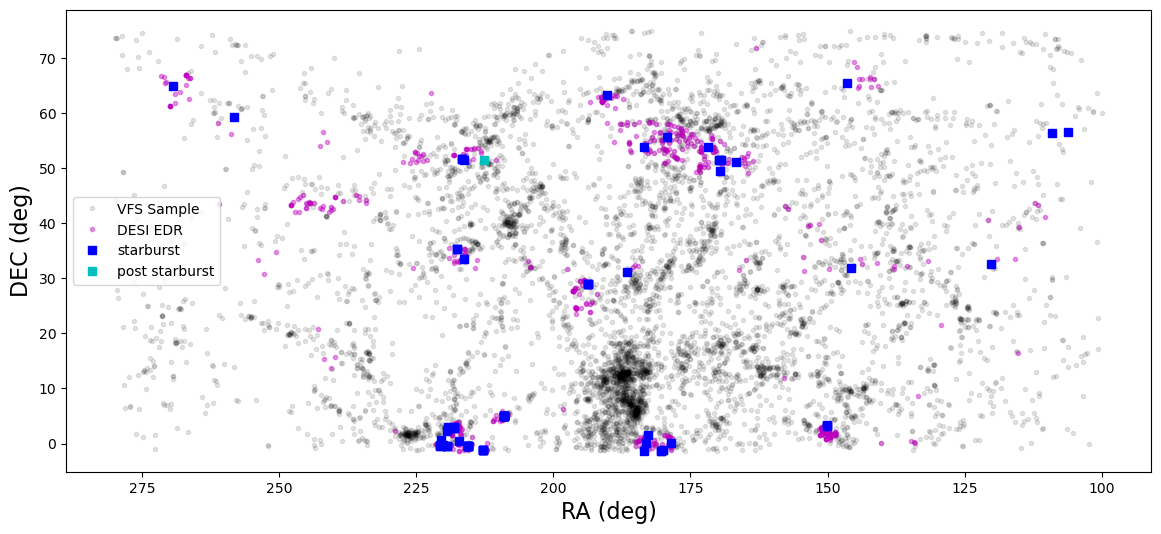

In [66]:
plt.figure(figsize=(14,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='VFS Sample')
plt.plot(vmeta['RA'],vmeta['DEC'],'m.',alpha=.4,label='DESI EDR')
plt.plot(vmeta['RA'][sbflag],vmeta['DEC'][sbflag],'bs',label='starburst')
plt.plot(vmeta['RA'][psbflag],vmeta['DEC'][psbflag],'cs',label='post starburst')

plt.gca().invert_xaxis()
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend()

(225.0, 205.0, -3.0, 8.0)

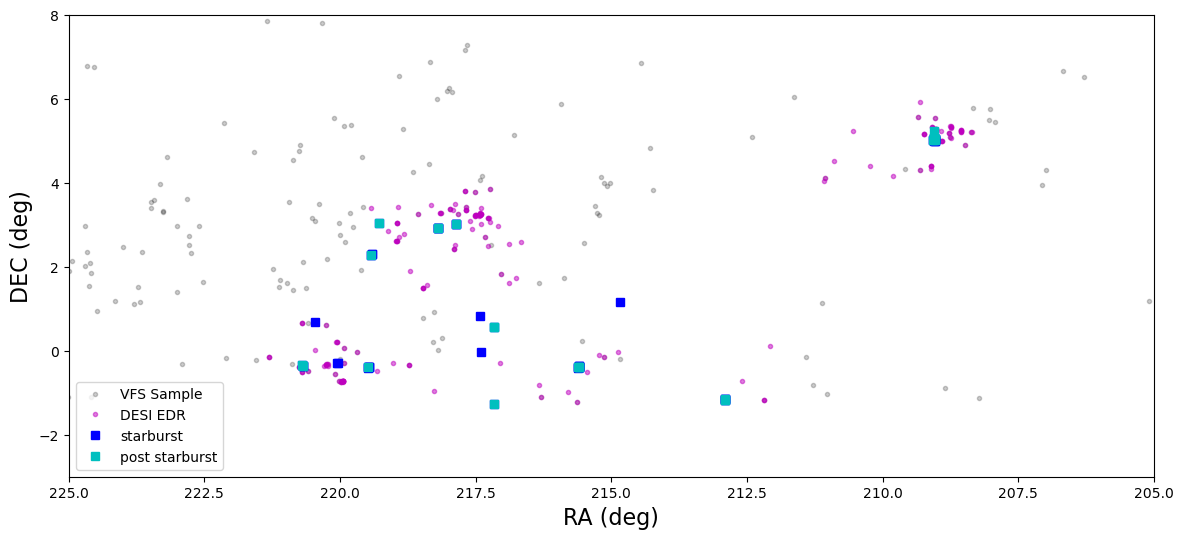

In [19]:
plt.figure(figsize=(14,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,label='VFS Sample')
plt.plot(vmeta['RA'],vmeta['DEC'],'m.',alpha=.5,label='DESI EDR')
plt.plot(vmeta['RA'][sbflag],vmeta['DEC'][sbflag],'bs',label='starburst')
plt.plot(vmeta['RA'][psbflag],vmeta['DEC'][psbflag],'cs',label='post starburst')

plt.gca().invert_xaxis()
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend()
plt.axis([225,205,-3,8])